In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [3]:
#`count()` function is used to count non-null values in each column
column_counts = data.count()

# Display the total number of rows in each column
print(column_counts)

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


In [4]:
summary_statistics = data.describe()
print(summary_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
# Replacing zeros with NaN for specific columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.NaN)

In [6]:
# Imputing NaN values with the median of each column
for column in columns_to_replace:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

In [7]:
# Check the updated summary statistics to confirm changes
updated_summary_statistics = data.describe()

In [8]:
# Displaying updated summary statistics
print(updated_summary_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

In [9]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_diabetes.csv'
data.to_csv(cleaned_file_path, index=False)

a)  set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    (5 points)

In [10]:
# Setting a seed for reproducibility
np.random.seed(0)

# Taking a random sample of 25 observations
sample = data.sample(25)

In [11]:
# Calculate mean and highest Glucose values in the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

In [12]:
# Calculate mean and highest Glucose values in the population
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

In [13]:
# Prepare data for chart comparison
comparison_data = {
    "Mean Glucose": [sample_mean_glucose, population_mean_glucose],
    "Max Glucose": [sample_max_glucose, population_max_glucose]
}
comparison_index = ["Sample", "Population"]

In [14]:
# Creating a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_data, index=comparison_index)

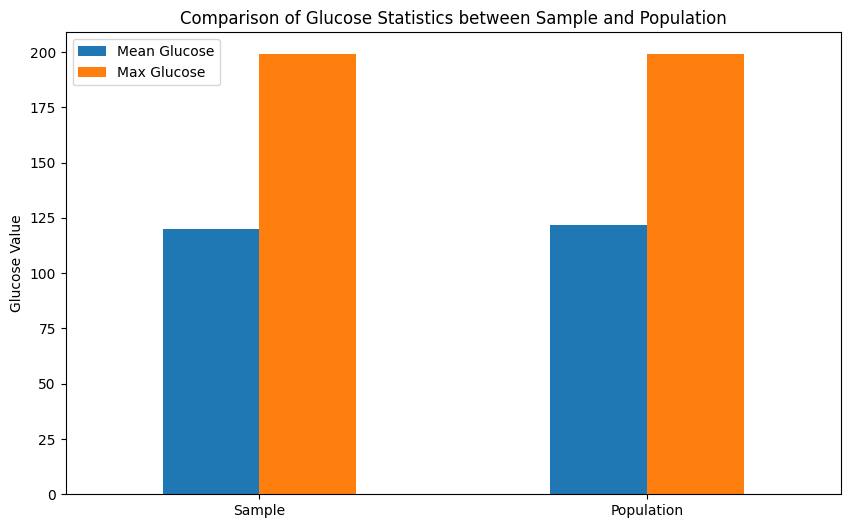

In [15]:
# Plotting the comparison chart
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Glucose Statistics between Sample and Population")
plt.ylabel("Glucose Value")
plt.xticks(rotation=0)
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts. (5 points)

In [16]:
# Calculating the 98th percentile of BMI for the sample and the population
bmi_98th_percentile_sample = np.percentile(sample['BMI'], 98)
bmi_98th_percentile_population = np.percentile(data['BMI'], 98)

In [17]:
# Prepare data for chart comparison
bmi_percentile_comparison_data = {
    "98th Percentile BMI": [bmi_98th_percentile_sample, bmi_98th_percentile_population]
}
bmi_percentile_comparison_index = ["Sample", "Population"]

In [18]:
# Creating a DataFrame for comparison
bmi_percentile_comparison_df = pd.DataFrame(bmi_percentile_comparison_data, index=bmi_percentile_comparison_index)

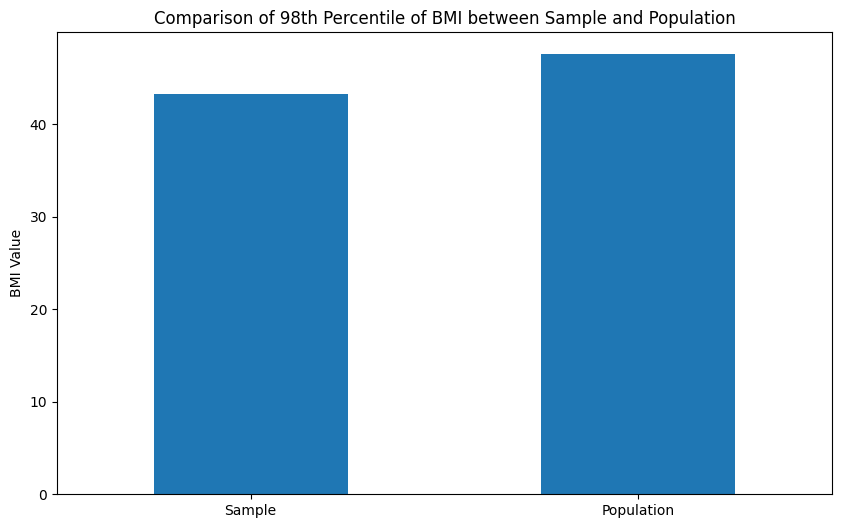

In [19]:
# Plotting the comparison chart
bmi_percentile_comparison_df.plot(kind="bar", figsize=(10, 6), legend=False)
plt.title("Comparison of 98th Percentile of BMI between Sample and Population")
plt.ylabel("BMI Value")
plt.xticks(rotation=0)
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.  (10 points)  

In [20]:
from scipy.stats import percentileofscore

In [21]:
# Bootstrap parameters
n_samples = 500
sample_size = 150

# Lists to store sample statistics
sample_means = []
sample_stds = []
sample_percentiles = []

In [22]:
# Bootstrapping process
for _ in range(n_samples):
    bootstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)
    sample_means.append(bootstrap_sample.mean())
    sample_stds.append(bootstrap_sample.std())
    sample_percentiles.append(percentileofscore(bootstrap_sample, data['BloodPressure'].mean()))

In [23]:
# Population statistics for comparison
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_bp = percentileofscore(data['BloodPressure'], population_mean_bp)

In [24]:
# Averaging the sample statistics
avg_sample_mean_bp = np.mean(sample_means)
avg_sample_std_bp = np.mean(sample_stds)
avg_sample_percentile_bp = np.mean(sample_percentiles)

In [25]:
# Prepare data for chart comparison
comparison_data_bp = {
    "Mean BloodPressure": [avg_sample_mean_bp, population_mean_bp],
    "Std BloodPressure": [avg_sample_std_bp, population_std_bp],
    "Percentile BloodPressure": [avg_sample_percentile_bp, population_percentile_bp]
}
comparison_index_bp = ["Bootstrap Samples", "Population"]

In [26]:
# Creating a DataFrame for comparison
comparison_df_bp = pd.DataFrame(comparison_data_bp, index=comparison_index_bp)

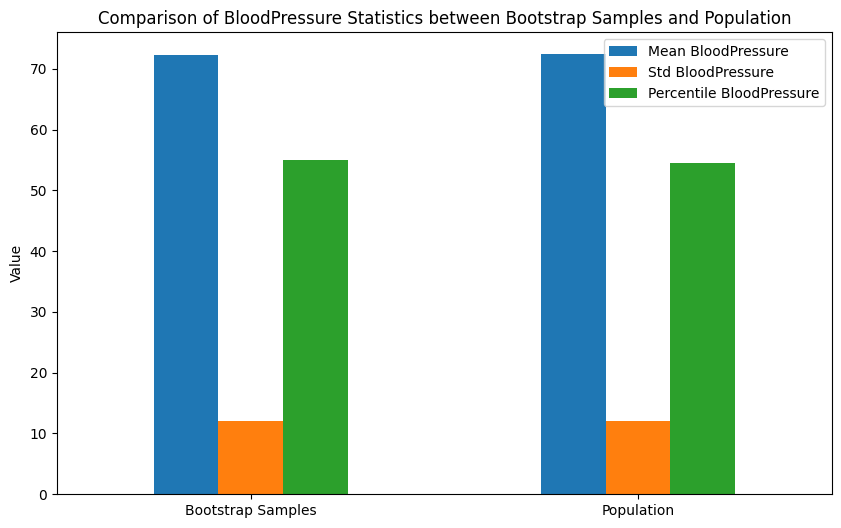

In [27]:
# Plotting the comparison chart
comparison_df_bp.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of BloodPressure Statistics between Bootstrap Samples and Population")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()